In [1]:
using Plots: scatter, scatter!, plot, plot!
using Flux
using StaticArrays
using Random: randperm

In [35]:
n = 100
dx = rand(n)
dy = sin.(4*pi*dx) + 0.1*randn(n);

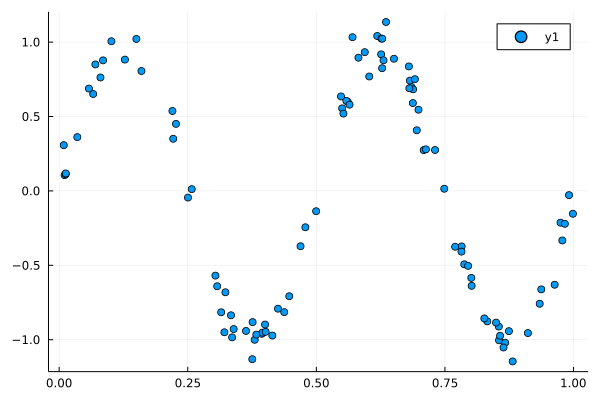

In [36]:
scatter(dx, dy)

In [37]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(
  Dense(1, 50, σ),                      # 100 parameters
  Dense(50, 50, σ),                     # 2_550 parameters
  Dense(50, 1),                         # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [38]:
# loss(x, y) = Flux.mse(m(x), y)
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [39]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Vector{Tuple{SVector{1, Float64}, SVector{1, Float64}}}:
 ([0.8552030321494515], [-1.0040803579951825])
 ([0.334060416576453], [-0.8359224310199713])
 ([0.6850252928933432], [0.6982459802829026])
 ([0.08539331202948652], [0.8772499177636813])
 ([0.1599893664913833], [0.8057744045603079])
 ([0.12787414235592032], [0.8824675613414086])
 ([0.8670732071603053], [-1.0200479035787073])
 ([0.7824109683790427], [-0.3730032404801043])
 ([0.911287624269014], [-0.9553206049077607])
 ([0.618434701680756], [1.041121321995712])
 ([0.7487148736922887], [0.014561222061905197])
 ([0.01060160371305019], [0.10587793261842297])
 ([0.6028483280376584], [0.7689173316999931])
 ⋮
 ([0.6354755511102591], [1.135183660365244])
 ([0.499619729614207], [-0.13652500208367083])
 ([0.07043372629557632], [0.8500608768761314])
 ([0.2504703414808316], [-0.04478071596169129])
 ([0.4254673517541867], [-0.7916929541077354])
 ([0.6915604936205849], [0.7508450149312281])
 ([0.9830650666078278], [-0.221236727078466

630

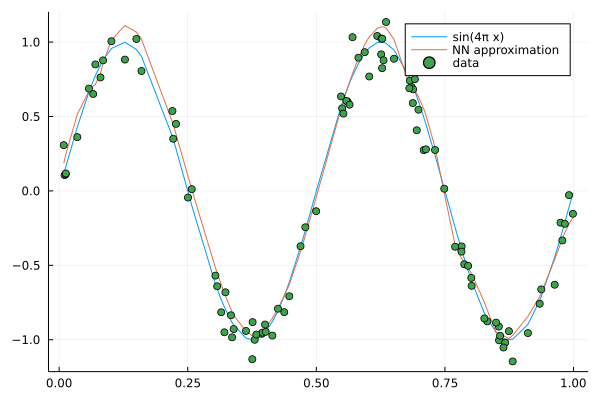

LoadError: InterruptException:

In [46]:
for i in 1:1000
    Flux.train!(loss, Flux.params(m), data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(4*pi*x)), label="sin(4π x)")
        plot!(p, sort(dx), first.(m.(SVector.(sort(dx)))), label="NN approximation")
        scatter!(p, dx, dy, label="data")
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end

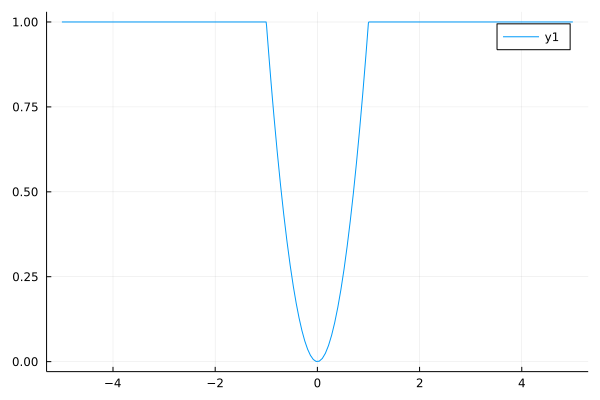

In [44]:
mynl(x) = min(1.0, max(0.0, x^2))
plot(mynl)

In [45]:
m = Chain(Dense(1,50,mynl), Dense(50,50,mynl), Dense(50,1))

Chain(
  Dense(1, 50, mynl),                   # 100 parameters
  Dense(50, 50, mynl),                  # 2_550 parameters
  Dense(50, 1),                         # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [13]:
@which Dense(50,50, σ)

Dense(in::Integer, out::Integer, σ; initW, initb, init, bias) in Flux at /home/zach/.julia/packages/Flux/qAdFM/src/layers/basic.jl:133

In [47]:
using Zygote

In [15]:
f(x) = 5x+3

f (generic function with 1 method)

In [48]:
f'(10)

5.0

In [49]:
@code_llvm f'(1)

;  @ /home/zach/.julia/packages/Zygote/FPUm3/src/compiler/interface.jl:81 within `#59`
define double @"julia_#59_10912"(i64 signext %0) #0 {
top:
;  @ /home/zach/.julia/packages/Zygote/FPUm3/src/compiler/interface.jl:83 within `#59`
  ret double 5.000000e+00
}


In [50]:
function g(x)
    y = zero(x)
    for i in 1:10
        y += x
    end
    return y
end

g (generic function with 1 method)

In [51]:
g'(5)

10

In [52]:
using BenchmarkTools
@benchmark g'(5)

BenchmarkTools.Trial: 10000 samples with 4 evaluations.
 Range (min … max):   7.723 μs …  3.403 ms  ┊ GC (min … max): 0.00% … 99.40%
 Time  (median):      9.280 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   10.831 μs ± 34.103 μs  ┊ GC (mean ± σ):  3.12% ±  0.99%

   ██▃▃▄▂▁▁                                                    
  ██████████▆▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▂▂▁▂▂▁▁▁▁▁▁▁▁ ▂
  7.72 μs         Histogram: frequency by time        21.5 μs <

 Memory estimate: 4.39 KiB, allocs estimate: 83.

In [53]:
@benchmark g(5)

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):  1.813 ns … 19.487 ns  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     2.038 ns              ┊ GC (median):    0.00%
 Time  (mean ± σ):   2.088 ns ±  0.446 ns  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █  ▆  ▁▆▂ ▂▆▂  █▆  ▃ ▁▁     ▁            ▁  ▁▁        ▁▁   ▂
  █▇▇██████▆████▇██▆██▇█████▇█████▇▇▆▇▇▇█████████████▇█████▇ █
  1.81 ns      Histogram: log(frequency) by time     2.94 ns <

 Memory estimate: 0 bytes, allocs estimate: 0.

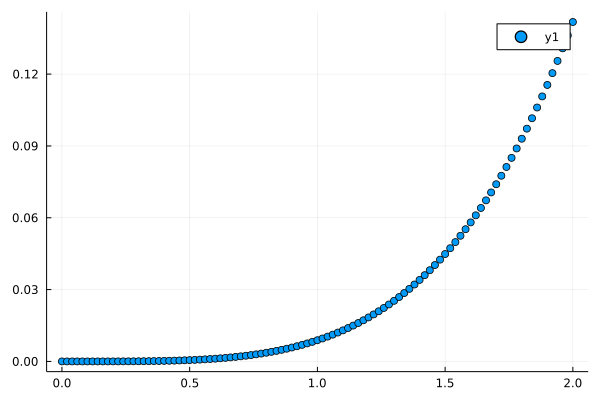

In [22]:
xs = collect(0.0:0.02:2.0)
scatter(xs, first.(m.(SVector.(xs))))


In [60]:
n = 100
dx = LinRange(0, 1, n)[randperm(n)]
dy = sin.(6*pi*dx);

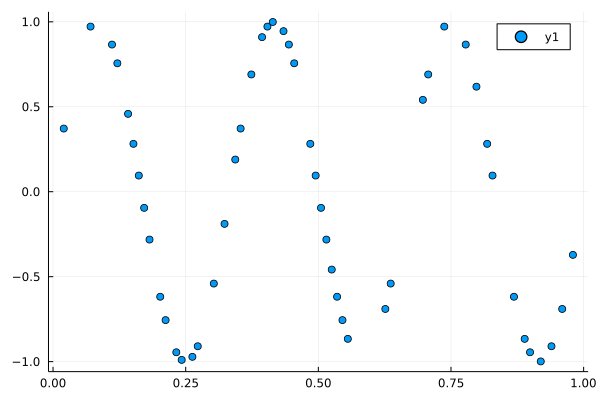

In [63]:
scatter(dx[1:50], dy)

In [69]:
m = Chain(Dense(1,50,σ), Dense(50,50,σ), Dense(50,1))

Chain(
  Dense(1, 50, σ),                      # 100 parameters
  Dense(50, 50, σ),                     # 2_550 parameters
  Dense(50, 1),                         # 51 parameters
)                   # Total: 6 arrays, 2_701 parameters, 10.926 KiB.

In [70]:
loss(x, y) = sum((m(x)-y).^2)

loss (generic function with 1 method)

In [71]:
data = [(SVector(dx[i]), SVector(dy[i])) for i in 1:length(dx)]

100-element Vector{Tuple{SVector{1, Float64}, SVector{1, Float64}}}:
 ([0.15151515151515152], [0.28173255684142967])
 ([0.4444444444444444], [0.8660254037844392])
 ([0.0707070707070707], [0.9718115683235417])
 ([0.23232323232323232], [-0.9450008187146683])
 ([0.1717171717171717], [-0.09505604330418263])
 ([0.7777777777777778], [0.8660254037844393])
 ([0.21212121212121213], [-0.7557495743542582])
 ([0.020202020202020204], [0.3716624556603275])
 ([0.16161616161616163], [0.09505604330418244])
 ([0.1111111111111111], [0.8660254037844387])
 ([0.1414141414141414], [0.4582265217274105])
 ([0.30303030303030304], [-0.5406408174555974])
 ([0.8282828282828283], [0.09505604330418381])
 ⋮
 ([0.5757575757575758], [-0.9898214418809328])
 ([0.8080808080808081], [0.45822652172741174])
 ([0.3333333333333333], [-2.4492935982947064e-16])
 ([0.6464646464646465], [-0.3716624556603267])
 ([0.1919191919191919], [-0.4582265217274099])
 ([0.25252525252525254], [-0.998867339183008])
 ([0.7575757575757576], [0.98

1000

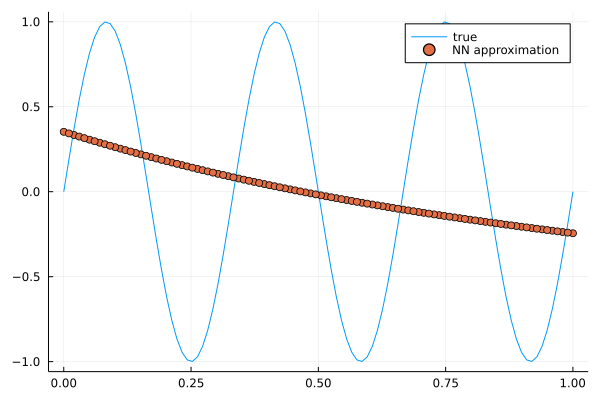

In [72]:
for i in 1:1000
    Flux.train!(loss, Flux.params(m), data, ADAM())
    if i%10 == 0
        p = plot(sort(dx), x->(sin(6*pi*x)), label="true")
        scatter!(p, dx, [first(y) for y in m.(d[1] for d in data)], label="NN approximation")
        IJulia.clear_output(true)
        display(i)
        display(p)
    end
end